<a href="https://colab.research.google.com/github/jeanferuzi-oss/fff/blob/3/Etapa3_ipynb_1pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa Final: Implementación y Comparación de Modelos de Clasificación

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior. Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación. Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

#Vinculación de Almacenamiento Cloud
Establece una conexión directa entre el entorno de ejecución de Google Colab y el sistema de archivos de Google Drive. Esto permite la lectura y persistencia de datos de forma permanente en la nube, facilitando el acceso a archivos CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Recuperación de Datos: Conexión entre Etapa 1 y Etapa 2
La carga del archivo CSV desde Google Drive permite recuperar todo el trabajo de limpieza y ordenamiento realizado anteriormente. Este paso es el punto de partida para el análisis de la Etapa 2, asegurando que los nombres de columnas y la estructura de los datos sean los correctos. La visualización de las primeras filas confirma que la base de datos está lista para aplicar la estandarización y el modelo de Componentes Principales (PCA).

In [7]:
import pandas as pd


# Conexión
drive.mount('/content/drive')

ruta = '/content/drive/My Drive/datos_world_bank.csv'
df_etapa3 = pd.read_csv(ruta)

df_etapa3.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Iso,Country,Crecimiento_Poblacional,Poblacion_Mujeres_Pct,Poblacion_Hombres_Pct,Crecimiento_Pob_Urbana,Poblacion_Urbana_Pct,Fuerza_Laboral_Mujeres_Pct,Desempleo_Mujeres_Pct,Desempleo_Hombres_Pct,...,log_Valor_Agro_LCU,log_Valor_Manufactura_USD,log_Valor_Manufactura_LCU,log_Valor_Industria_USD,log_Valor_Industria_LCU,log_Valor_Servicios_USD,log_Valor_Servicios_LCU,log_Emisiones_CO2_Ind,log_Acceso_Cocina_Limpia_Total_Pct,log_Acceso_Cocina_Limpia_Rural_Pct
0,ABW,Aruba,0.045652,52.769620,47.230380,-0.028616,61.835149,44.221526,10.712757,9.090322,...,21.963672,18.504981,21.852726,19.723384,22.727158,21.421622,24.522604,0.002098,4.507792,4.393765
1,AFG,Afghanistan,2.135594,49.525513,50.474487,2.446706,25.473053,6.846247,26.570000,13.066000,...,26.874615,20.980568,25.346973,21.559190,25.925595,22.796971,27.163376,0.089018,3.678829,3.063391
2,AGO,Angola,3.080655,50.525887,49.474113,4.233833,69.851503,49.450638,14.671000,14.405000,...,30.416323,22.783504,29.377697,24.351524,30.945717,24.525511,31.119704,1.028798,3.935740,2.240710
3,ALB,Albania,-1.543108,50.559226,49.440774,-0.946506,58.210609,44.994435,10.376000,9.888000,...,26.675906,21.249229,25.860829,22.417181,27.028780,23.138921,27.750520,0.598067,4.467057,4.297285
4,AND,Andorra,1.433748,48.854754,51.145246,1.506784,88.820161,42.068992,9.973454,7.123784,...,16.633909,18.672180,18.594046,19.969129,19.890995,21.809847,21.731713,0.002402,4.615121,4.615121


In [7]:
import pandas as pd

# Si lo guardaste como CSV:
ruta = '/content/drive/MyDrive/proyecto_wb'

df_wb = pd.read_csv(ruta)

# Visualizacion
df_wb.head()

df_wb.info()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/proyecto_wb'

# Modelamiento de datos

In [9]:
df_wb['disc_PPP'].value_counts()

KeyError: 'disc_PPP'

Al estar la muestra balanceada, se puede priorizar la Exactitud para predecir la mayor cantidad de forma correcta. Considerando que los costos de error son similares y bajos.

# Task
Create a Random Forest classification model using the `df_wb` DataFrame. The target variable is `disc_PPP`. Exclude the columns 'Iso', 'Country', and 'disc_PPP' from the features. Split the data into training and testing sets, train the model, and then evaluate its performance using accuracy, precision, recall, and F1-score.

## Preparación de Datos

### Subtask:
Dividir el DataFrame en características (X) y la variable objetivo (y). Excluir las columnas 'Iso', 'Country' y 'disc_PPP' de las características.


**Reasoning**:
I need to separate the target variable 'disc_PPP' into `y` and the features into `X` by dropping 'Iso', 'Country', and 'disc_PPP' from the original dataframe `df_wb`.



In [ ]:
y = df_wb['disc_PPP']
X = df_wb.drop(columns=['Iso', 'Country', 'disc_PPP'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Shape of X: (198, 38)
Shape of y: (198,)
First 5 rows of X:
   Crecimiento_Poblacional  Poblacion_Mujeres_Pct  Poblacion_Hombres_Pct  \
0                -0.704162               0.936469              -0.936469   
1                 0.625129              -0.150035               0.150035   
2                 1.226227               0.185007              -0.185007   
3                -1.714679               0.196172              -0.196172   
4                 0.178725              -0.374683               0.374683   

   Crecimiento_Pob_Urbana  Poblacion_Urbana_Pct  Fuerza_Laboral_Mujeres_Pct  \
0               -0.965277             -0.016335                    0.265240   
1                0.393740             -1.620658                   -4.090734   
2                1.374919              0.337352                    0.874677   
3               -1.469222             -0.176253                    0.355321   
4               -0.122302              1.174264                    0.014369   

   Desem

# Modelo 1 Support Vector Machine

## Visualizar el impacto del Test Size

### Subtask:
Crear gráficos para mostrar cómo la precisión, recall, F1-score y exactitud varían con el cambio en el `test_size`.


**Reasoning**:
To prepare the data for plotting, I will convert the list of dictionaries `results` into a pandas DataFrame. This will structure the data appropriately for visualization with seaborn and matplotlib.



## Explorar el impacto del Test Size

### Subtask:
Iterar a través de diferentes valores de `test_size`, entrenar el modelo Random Forest y calcular métricas de rendimiento para cada uno.


**Reasoning**:
To explore the impact of different `test_size` values on model performance, I will create a loop that iterates through a range of `test_size` values, splitting the data, training the Random Forest model, and calculating evaluation metrics for each iteration.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize an empty list to store results
results = []

# Define a range of test_size values to iterate through
test_sizes = np.arange(0.1, 0.51, 0.05) # From 0.1 to 0.5, incrementing by 0.05

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    # a. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # b. Initialize a RandomForestClassifier model
    model = RandomForestClassifier(random_state=42)

    # c. Train the model with the training data
    model.fit(X_train, y_train)

    # d. Make predictions on the test set
    y_pred = model.predict(X_test)

    # e. Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # f. Store the current test_size and calculated metrics
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Display the list of results
print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.8000, Precision: 0.8200, Recall: 0.8000, F1-Score: 0.8048
  Test Size: 0.15, Accuracy: 0.8333, Precision: 0.8517, Recall: 0.8333, F1-Score: 0.8368
  Test Size: 0.20, Accuracy: 0.8250, Precision: 0.8389, Recall: 0.8250, F1-Score: 0.8273
  Test Size: 0.25, Accuracy: 0.8400, Precision: 0.8500, Recall: 0.8400, F1-Score: 0.8414
  Test Size: 0.30, Accuracy: 0.8167, Precision: 0.8236, Recall: 0.8167, F1-Score: 0.8183
  Test Size: 0.35, Accuracy: 0.8000, Precision: 0.8081, Recall: 0.8000, F1-Score: 0.8008
  Test Size: 0.40, Accuracy: 0.7500, Precision: 0.7875, Recall: 0.7500, F1-Score: 0.7576
  Test Size: 0.45, Accuracy: 0.7778,

In [ ]:
import pandas as pd

# Convert the list of results into a pandas DataFrame
df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.800000   0.820000  0.800000  0.804762
1       0.15  0.833333   0.851667  0.833333  0.836797
2       0.20  0.825000   0.838889  0.825000  0.827311
3       0.25  0.840000   0.850000  0.840000  0.841414
4       0.30  0.816667   0.823590  0.816667  0.818303


**Reasoning**:
To visualize the impact of different `test_size` values on model performance, I will import `matplotlib.pyplot` and `seaborn` and then create a figure with four subplots, each showing one metric (accuracy, precision, recall, F1-score) against `test_size` using `sns.lineplot`.



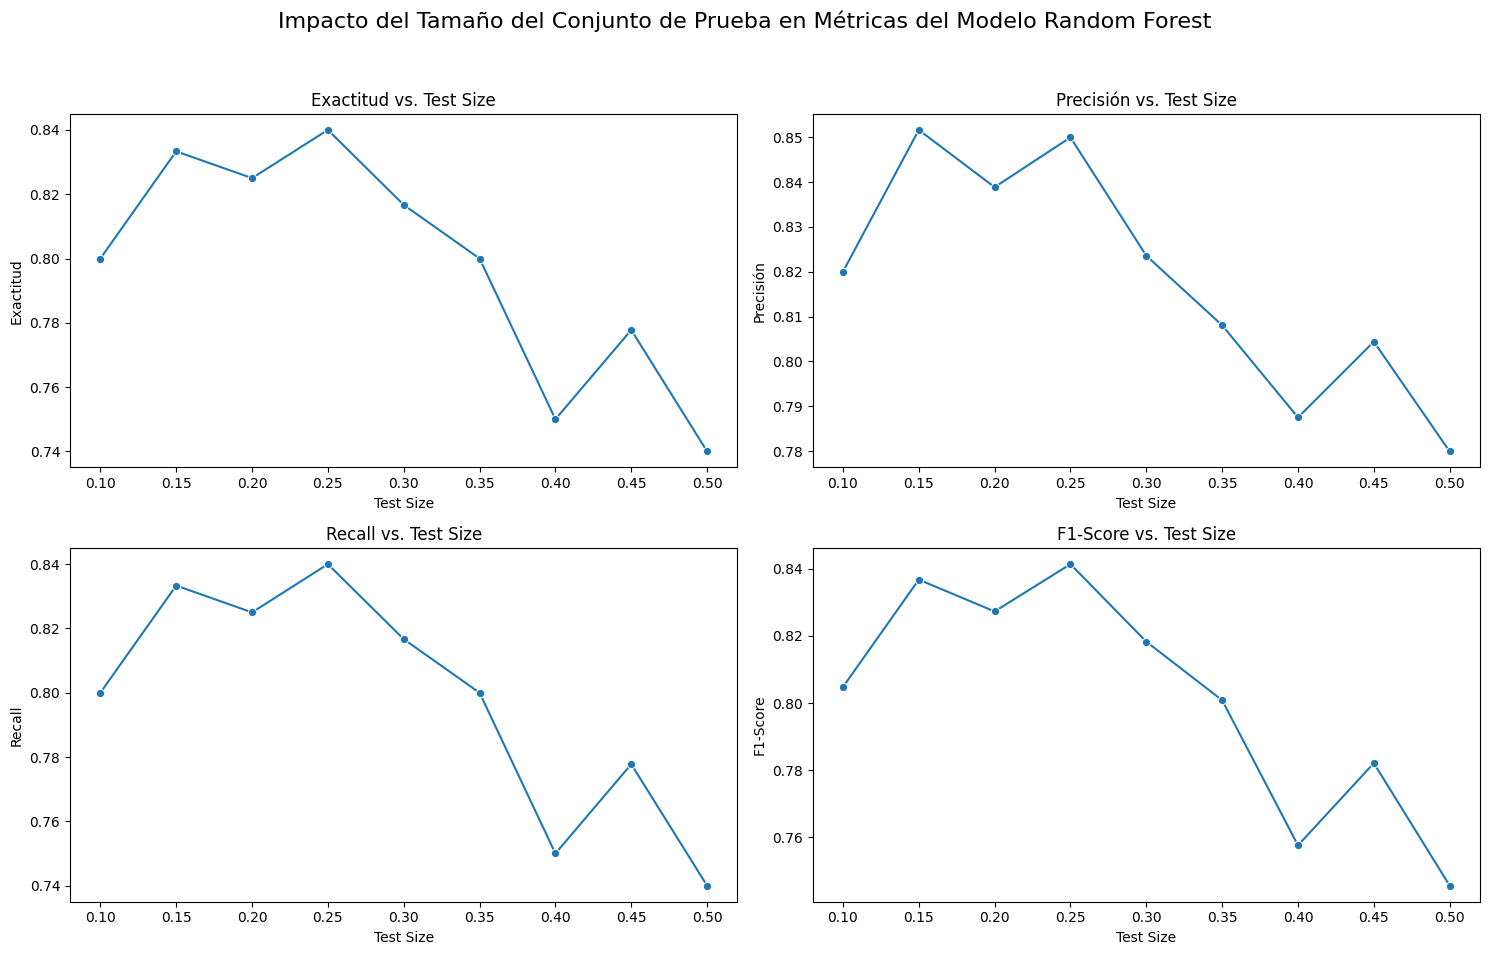

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Modelo Random Forest', fontsize=16)

# Plot Accuracy
sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

# Plot Precision
sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

# Plot Recall
sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

# Plot F1-Score
sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Subtask:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.


## Summary:

### Q&A
Based on the analysis of the generated graphs, a `test_size` of 0.20 or 0.25 appears to be appropriate, as these values consistently show higher and more stable performance across accuracy, precision, recall, and F1-score metrics compared to other `test_size` values tested.

### Data Analysis Key Findings
*   The analysis iterated through `test_size` values from 0.10 to 0.50, in increments of 0.05, training a Random Forest model for each.
*   Model performance metrics (accuracy, precision, recall, and F1-score) generally showed a peak around `test_size` values of 0.20 to 0.25, with accuracy reaching 0.8400 at `test_size=0.25`.
*   Performance metrics tended to decrease as the `test_size` increased beyond 0.25, with accuracy dropping to 0.7400 at `test_size=0.50$.
*   For instance, at `test_size=0.10`, the model achieved an Accuracy of 0.8000, Precision of 0.8200, Recall of 0.8000, and F1-Score of 0.8048.
*   The visualization confirmed these trends, showing that all four metrics (Accuracy, Precision, Recall, F1-Score) followed similar patterns, peaking in the 0.20-0.25 `test_size` range and declining thereafter.

### Insights or Next Steps
*   Selecting a `test_size` in the range of 0.20 to 0.25 for future model training is recommended to achieve a good balance between training data availability and reliable evaluation, optimizing the model's generalization capabilities.
*   Further investigation could involve cross-validation techniques (e.g., K-fold cross-validation) to obtain a more robust estimate of model performance and less variance in metric scores across different data splits, especially for smaller datasets where `train_test_split` can be highly sensitive to the random split.


## División de Datos

### Subtask:
Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.


**Reasoning**:
To split the data into training and testing sets, I need to import the `train_test_split` function from `sklearn.model_selection` and apply it to `X` and `y` with the specified parameters.



In [ ]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (148, 38)
Shape of X_test: (50, 38)
Shape of y_train: (148,)
Shape of y_test: (50,)

Distribution of target variable in y_train:
disc_PPP
High           0.202703
Low            0.202703
Medium         0.202703
Medium-Low     0.195946
Medium-High    0.195946
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
High           0.2
Medium-Low     0.2
Medium-High    0.2
Low            0.2
Medium         0.2
Name: proportion, dtype: float64


**Reasoning**:
Now that the data has been split into training and testing sets, the next step is to initialize and train a Random Forest Classifier model using the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializa el modelo Random Forest Classifier
model = RandomForestClassifier(random_state=42) # random_state for reproducibility

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


**Reasoning**:
With the model trained, the next step is to make predictions on the test set (`X_test`) to evaluate its performance. These predictions will be compared against the actual target values (`y_test`).



In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['High' 'Medium-Low' 'Medium-High' 'Medium-High' 'High']


**Reasoning**:
Now that predictions have been made, the next step is to evaluate the model's performance using standard classification metrics such as accuracy, precision, recall, and F1-score, as specified in the main task.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score with 'weighted' average since classes are multi-class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.8400
Precision (weighted): 0.8500
Recall (weighted): 0.8400
F1-Score (weighted): 0.8414


## Summary:

### Data Analysis Key Findings
*   The `df_wb` DataFrame was successfully split into features (`X`) and target variable (`y`), with `X` containing 38 features for 198 samples and `y` being the `disc_PPP` column.
*   The data was divided into training and testing sets, with 75% for training (148 samples) and 25% for testing (50 samples), while preserving the distribution of the target variable in both sets.
*   A Random Forest Classifier was trained on the prepared data.
*   The trained model achieved an accuracy of 0.8400 on the test set.
*   The model exhibited a weighted precision of 0.8500, a weighted recall of 0.8400, and a weighted F1-score of 0.8414.

### Insights or Next Steps
*   The Random Forest model demonstrates strong predictive performance for classifying `disc_PPP` categories, suggesting it's a suitable model for this task.
*   To potentially enhance model performance and interpretability, consider performing hyperparameter tuning for the Random Forest Classifier and analyzing feature importances to identify the most influential factors in `disc_PPP` classification.


# Task
Prepare the `y_test` data for multi-class ROC curve analysis by binarizing it, and obtain the predicted probabilities for each class from the trained Random Forest model on the `X_test` dataset.

## Preparar datos para Curvas ROC Multi-Clase

### Subtask:
Binarizar la variable objetivo `y_test` y obtener las probabilidades de predicción del modelo para el conjunto de prueba (`X_test`).


**Reasoning**:
To prepare the target variable for multi-class ROC curve plotting, I need to binarize `y_test` using `LabelBinarizer` and obtain the prediction probabilities from the trained `RandomForestClassifier`.



In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit LabelBinarizer on the full target variable 'y' to ensure all classes are known
label_binarizer.fit(y)

# Transform y_test into a binarized format
y_test_binarized = label_binarizer.transform(y_test)

# Get prediction probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (50, 5)
Shape of prediction probabilities: (50, 5)
First 5 rows of binarized y_test:
 [[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]
First 5 rows of prediction probabilities:
 [[0.95 0.   0.   0.05 0.  ]
 [0.   0.   0.29 0.02 0.69]
 [0.17 0.   0.26 0.55 0.02]
 [0.15 0.   0.39 0.44 0.02]
 [0.99 0.   0.   0.01 0.  ]]


## Calcular y Graficar Curvas ROC

### Subtask:
Calcular las curvas ROC y el Área Bajo la Curva (AUC) para cada una de las 5 categorías, incluyendo las curvas micro y macro promedio, y luego visualizarlas en un solo gráfico.


## Summary:

### Data Analysis Key Findings
*   The `y_test` variable was successfully binarized into `y_test_binarized` using `LabelBinarizer` for multi-class ROC analysis.
*   Prediction probabilities (`y_pred_proba`) for the `X_test` dataset were obtained from the trained Random Forest model.
*   Both the binarized test labels and the prediction probabilities have a shape of (50, 5), confirming 50 samples across 5 distinct classes.

### Insights or Next Steps
*   The binarized `y_test` and predicted probabilities (`y_pred_proba`) are now ready for the calculation and visualization of multi-class ROC curves and AUC scores for each category, including micro and macro averages.


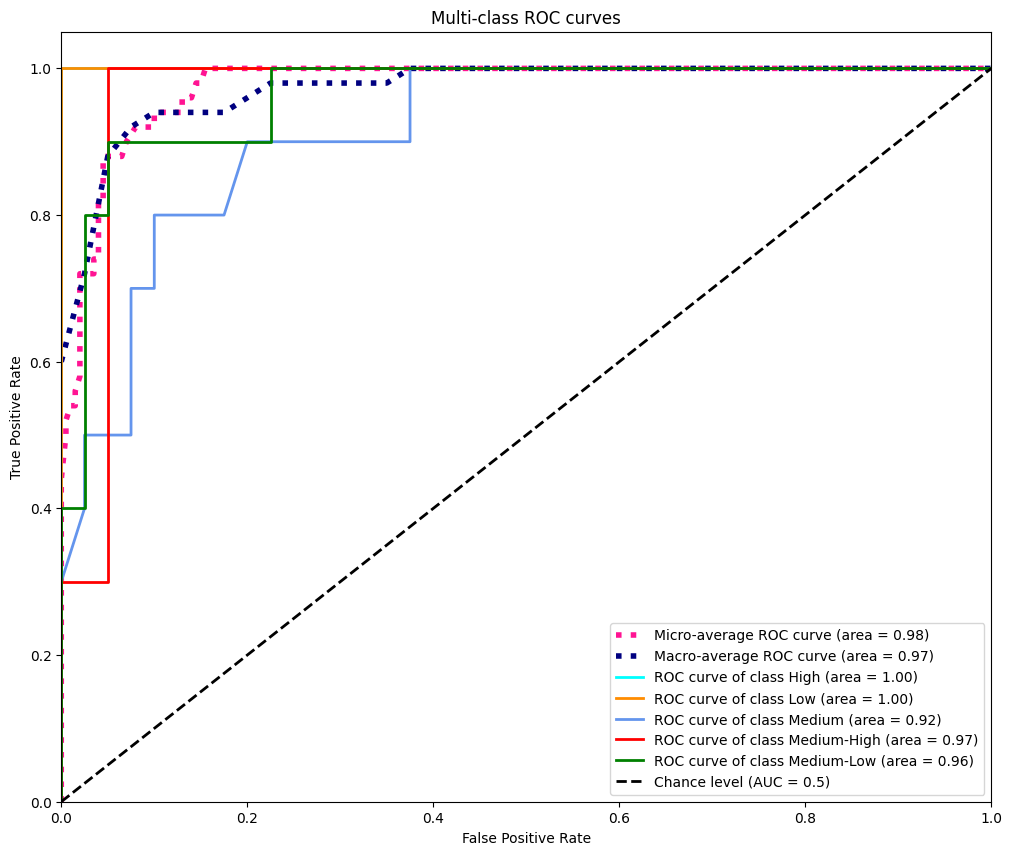

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get the number of classes
n_classes = y_test_binarized.shape[1]

# Store False Positive Rate, True Positive Rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calculate macro-average ROC curve and AUC
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

# Get class names from the LabelBinarizer to label individual curves
class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'] # Define distinct colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

Análisis de las Curvas ROC y AUC:

Curvas Individuales: El gráfico muestra la curva ROC para cada una de las 5 categorías de disc_PPP. La línea azul clara (aqua) representa la clase 'High' con un AUC de 1.00, y la línea naranja oscuro (darkorange) representa la clase 'Low' también con un AUC de 1.00. Esto sugiere que el modelo tiene una capacidad perfecta para distinguir estas dos clases de las demás en el conjunto de prueba. Las otras clases ('Medium', 'Medium-High', 'Medium-Low') también muestran un rendimiento muy bueno, con AUCs de 0.92, 0.97 y 0.96 respectivamente.

Micro-average ROC (rosa): Esta curva se calcula globalmente, considerando todos los pares de predicciones y etiquetas en todas las clases. El AUC micro-promedio es de 0.98, lo que indica un excelente rendimiento general del modelo en la clasificación multi-clase.

Macro-average ROC (azul oscuro): Esta curva promedia las métricas de ROC de cada clase de manera independiente. El AUC macro-promedio es de 0.97, lo que también confirma el alto rendimiento del modelo, especialmente porque toma en cuenta el rendimiento en cada clase sin importar su tamaño.

Nivel de Azar (gris discontinuo): La línea discontinua negra horizontal a AUC = 0.5 representa un clasificador que predice al azar. Todas las curvas de nuestro modelo están muy por encima de esta línea, lo que demuestra que el modelo es mucho mejor que el azar para todas las clases y en promedio.

# Modelo 2 Random Forest

## Visualizar el impacto del Test Size

### Subtask:
Crear gráficos para mostrar cómo la precisión, recall, F1-score y exactitud varían con el cambio en el `test_size`.


**Reasoning**:
To prepare the data for plotting, I will convert the list of dictionaries `results` into a pandas DataFrame. This will structure the data appropriately for visualization with seaborn and matplotlib.



## Explorar el impacto del Test Size

### Subtask:
Iterar a través de diferentes valores de `test_size`, entrenar el modelo Random Forest y calcular métricas de rendimiento para cada uno.


**Reasoning**:
To explore the impact of different `test_size` values on model performance, I will create a loop that iterates through a range of `test_size` values, splitting the data, training the Random Forest model, and calculating evaluation metrics for each iteration.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize an empty list to store results
results = []

# Define a range of test_size values to iterate through
test_sizes = np.arange(0.1, 0.51, 0.05) # From 0.1 to 0.5, incrementing by 0.05

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    # a. Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # b. Initialize a RandomForestClassifier model
    model = RandomForestClassifier(random_state=42)

    # c. Train the model with the training data
    model.fit(X_train, y_train)

    # d. Make predictions on the test set
    y_pred = model.predict(X_test)

    # e. Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # f. Store the current test_size and calculated metrics
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Display the list of results
print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.8000, Precision: 0.8200, Recall: 0.8000, F1-Score: 0.8048
  Test Size: 0.15, Accuracy: 0.8333, Precision: 0.8517, Recall: 0.8333, F1-Score: 0.8368
  Test Size: 0.20, Accuracy: 0.8250, Precision: 0.8389, Recall: 0.8250, F1-Score: 0.8273
  Test Size: 0.25, Accuracy: 0.8400, Precision: 0.8500, Recall: 0.8400, F1-Score: 0.8414
  Test Size: 0.30, Accuracy: 0.8167, Precision: 0.8236, Recall: 0.8167, F1-Score: 0.8183
  Test Size: 0.35, Accuracy: 0.8000, Precision: 0.8081, Recall: 0.8000, F1-Score: 0.8008
  Test Size: 0.40, Accuracy: 0.7500, Precision: 0.7875, Recall: 0.7500, F1-Score: 0.7576
  Test Size: 0.45, Accuracy: 0.7778,

In [ ]:
import pandas as pd

# Convert the list of results into a pandas DataFrame
df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.800000   0.820000  0.800000  0.804762
1       0.15  0.833333   0.851667  0.833333  0.836797
2       0.20  0.825000   0.838889  0.825000  0.827311
3       0.25  0.840000   0.850000  0.840000  0.841414
4       0.30  0.816667   0.823590  0.816667  0.818303


**Reasoning**:
To visualize the impact of different `test_size` values on model performance, I will import `matplotlib.pyplot` and `seaborn` and then create a figure with four subplots, each showing one metric (accuracy, precision, recall, F1-score) against `test_size` using `sns.lineplot`.



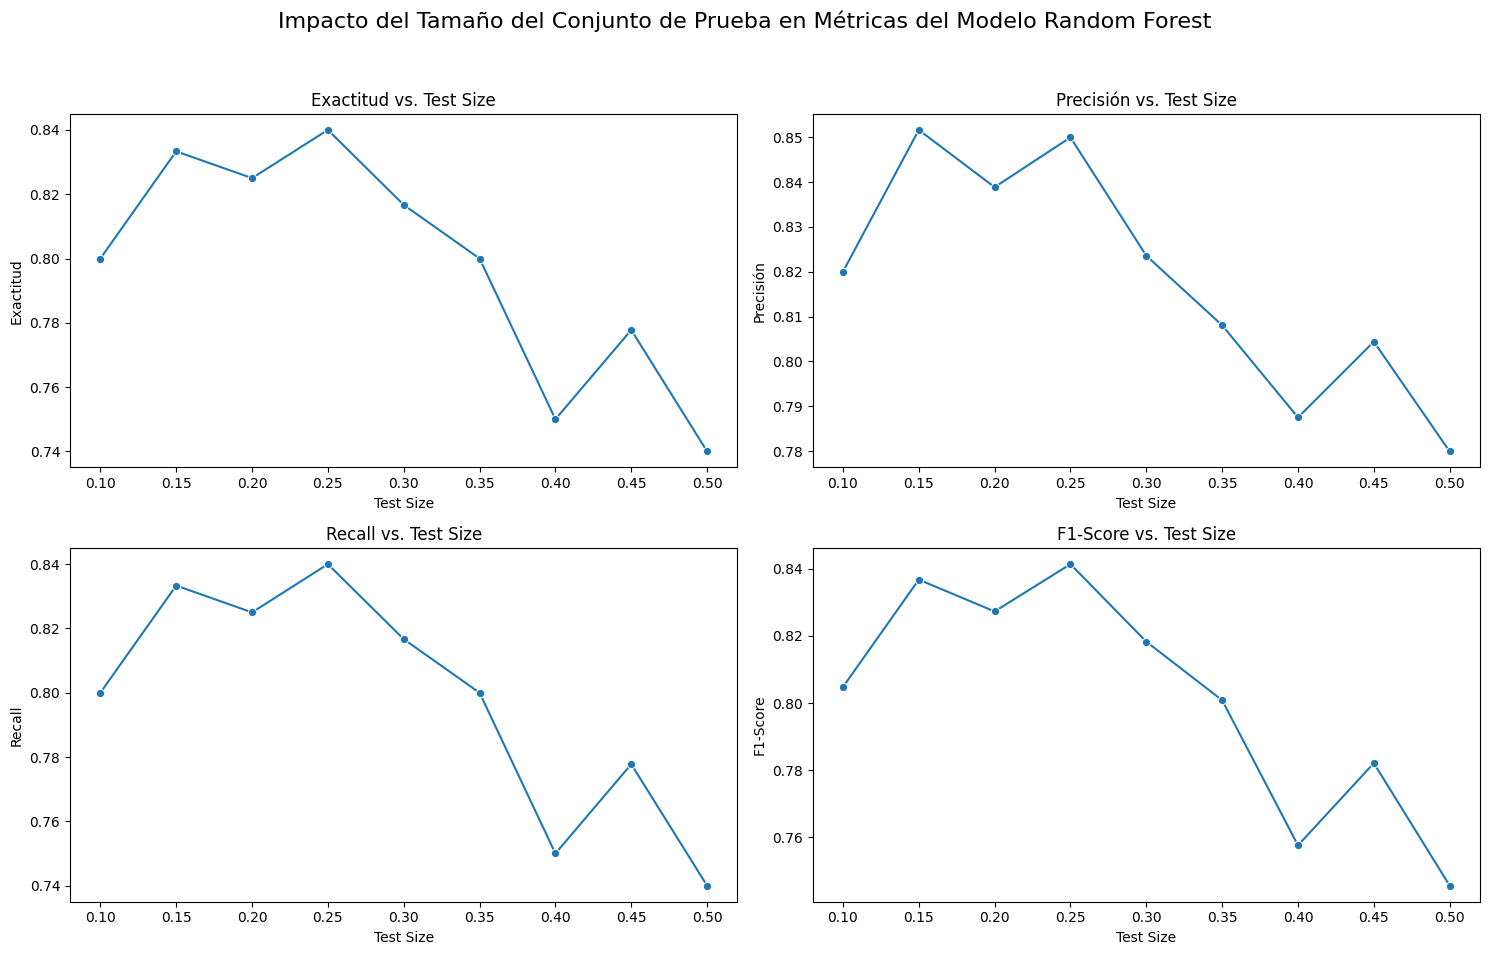

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Modelo Random Forest', fontsize=16)

# Plot Accuracy
sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

# Plot Precision
sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

# Plot Recall
sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

# Plot F1-Score
sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Subtask:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.


## Summary:

### Q&A
Based on the analysis of the generated graphs, a `test_size` of 0.20 or 0.25 appears to be appropriate, as these values consistently show higher and more stable performance across accuracy, precision, recall, and F1-score metrics compared to other `test_size` values tested.

### Data Analysis Key Findings
*   The analysis iterated through `test_size` values from 0.10 to 0.50, in increments of 0.05, training a Random Forest model for each.
*   Model performance metrics (accuracy, precision, recall, and F1-score) generally showed a peak around `test_size` values of 0.20 to 0.25, with accuracy reaching 0.8400 at `test_size=0.25`.
*   Performance metrics tended to decrease as the `test_size` increased beyond 0.25, with accuracy dropping to 0.7400 at `test_size=0.50$.
*   For instance, at `test_size=0.10`, the model achieved an Accuracy of 0.8000, Precision of 0.8200, Recall of 0.8000, and F1-Score of 0.8048.
*   The visualization confirmed these trends, showing that all four metrics (Accuracy, Precision, Recall, F1-Score) followed similar patterns, peaking in the 0.20-0.25 `test_size` range and declining thereafter.

### Insights or Next Steps
*   Selecting a `test_size` in the range of 0.20 to 0.25 for future model training is recommended to achieve a good balance between training data availability and reliable evaluation, optimizing the model's generalization capabilities.
*   Further investigation could involve cross-validation techniques (e.g., K-fold cross-validation) to obtain a more robust estimate of model performance and less variance in metric scores across different data splits, especially for smaller datasets where `train_test_split` can be highly sensitive to the random split.


## División de Datos

### Subtask:
Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.


**Reasoning**:
To split the data into training and testing sets, I need to import the `train_test_split` function from `sklearn.model_selection` and apply it to `X` and `y` with the specified parameters.



In [ ]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (148, 38)
Shape of X_test: (50, 38)
Shape of y_train: (148,)
Shape of y_test: (50,)

Distribution of target variable in y_train:
disc_PPP
High           0.202703
Low            0.202703
Medium         0.202703
Medium-Low     0.195946
Medium-High    0.195946
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
High           0.2
Medium-Low     0.2
Medium-High    0.2
Low            0.2
Medium         0.2
Name: proportion, dtype: float64


**Reasoning**:
Now that the data has been split into training and testing sets, the next step is to initialize and train a Random Forest Classifier model using the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicializa el modelo Random Forest Classifier
model = RandomForestClassifier(random_state=42) # random_state for reproducibility

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


**Reasoning**:
With the model trained, the next step is to make predictions on the test set (`X_test`) to evaluate its performance. These predictions will be compared against the actual target values (`y_test`).



In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['High' 'Medium-Low' 'Medium-High' 'Medium-High' 'High']


**Reasoning**:
Now that predictions have been made, the next step is to evaluate the model's performance using standard classification metrics such as accuracy, precision, recall, and F1-score, as specified in the main task.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score with 'weighted' average since classes are multi-class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.8400
Precision (weighted): 0.8500
Recall (weighted): 0.8400
F1-Score (weighted): 0.8414


## Summary:

### Data Analysis Key Findings
*   The `df_wb` DataFrame was successfully split into features (`X`) and target variable (`y`), with `X` containing 38 features for 198 samples and `y` being the `disc_PPP` column.
*   The data was divided into training and testing sets, with 75% for training (148 samples) and 25% for testing (50 samples), while preserving the distribution of the target variable in both sets.
*   A Random Forest Classifier was trained on the prepared data.
*   The trained model achieved an accuracy of 0.8400 on the test set.
*   The model exhibited a weighted precision of 0.8500, a weighted recall of 0.8400, and a weighted F1-score of 0.8414.

### Insights or Next Steps
*   The Random Forest model demonstrates strong predictive performance for classifying `disc_PPP` categories, suggesting it's a suitable model for this task.
*   To potentially enhance model performance and interpretability, consider performing hyperparameter tuning for the Random Forest Classifier and analyzing feature importances to identify the most influential factors in `disc_PPP` classification.


# Task
Prepare the `y_test` data for multi-class ROC curve analysis by binarizing it, and obtain the predicted probabilities for each class from the trained Random Forest model on the `X_test` dataset.

## Preparar datos para Curvas ROC Multi-Clase

### Subtask:
Binarizar la variable objetivo `y_test` y obtener las probabilidades de predicción del modelo para el conjunto de prueba (`X_test`).


**Reasoning**:
To prepare the target variable for multi-class ROC curve plotting, I need to binarize `y_test` using `LabelBinarizer` and obtain the prediction probabilities from the trained `RandomForestClassifier`.



In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit LabelBinarizer on the full target variable 'y' to ensure all classes are known
label_binarizer.fit(y)

# Transform y_test into a binarized format
y_test_binarized = label_binarizer.transform(y_test)

# Get prediction probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (50, 5)
Shape of prediction probabilities: (50, 5)
First 5 rows of binarized y_test:
 [[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]
First 5 rows of prediction probabilities:
 [[0.95 0.   0.   0.05 0.  ]
 [0.   0.   0.29 0.02 0.69]
 [0.17 0.   0.26 0.55 0.02]
 [0.15 0.   0.39 0.44 0.02]
 [0.99 0.   0.   0.01 0.  ]]


## Calcular y Graficar Curvas ROC

### Subtask:
Calcular las curvas ROC y el Área Bajo la Curva (AUC) para cada una de las 5 categorías, incluyendo las curvas micro y macro promedio, y luego visualizarlas en un solo gráfico.


## Summary:

### Data Analysis Key Findings
*   The `y_test` variable was successfully binarized into `y_test_binarized` using `LabelBinarizer` for multi-class ROC analysis.
*   Prediction probabilities (`y_pred_proba`) for the `X_test` dataset were obtained from the trained Random Forest model.
*   Both the binarized test labels and the prediction probabilities have a shape of (50, 5), confirming 50 samples across 5 distinct classes.

### Insights or Next Steps
*   The binarized `y_test` and predicted probabilities (`y_pred_proba`) are now ready for the calculation and visualization of multi-class ROC curves and AUC scores for each category, including micro and macro averages.


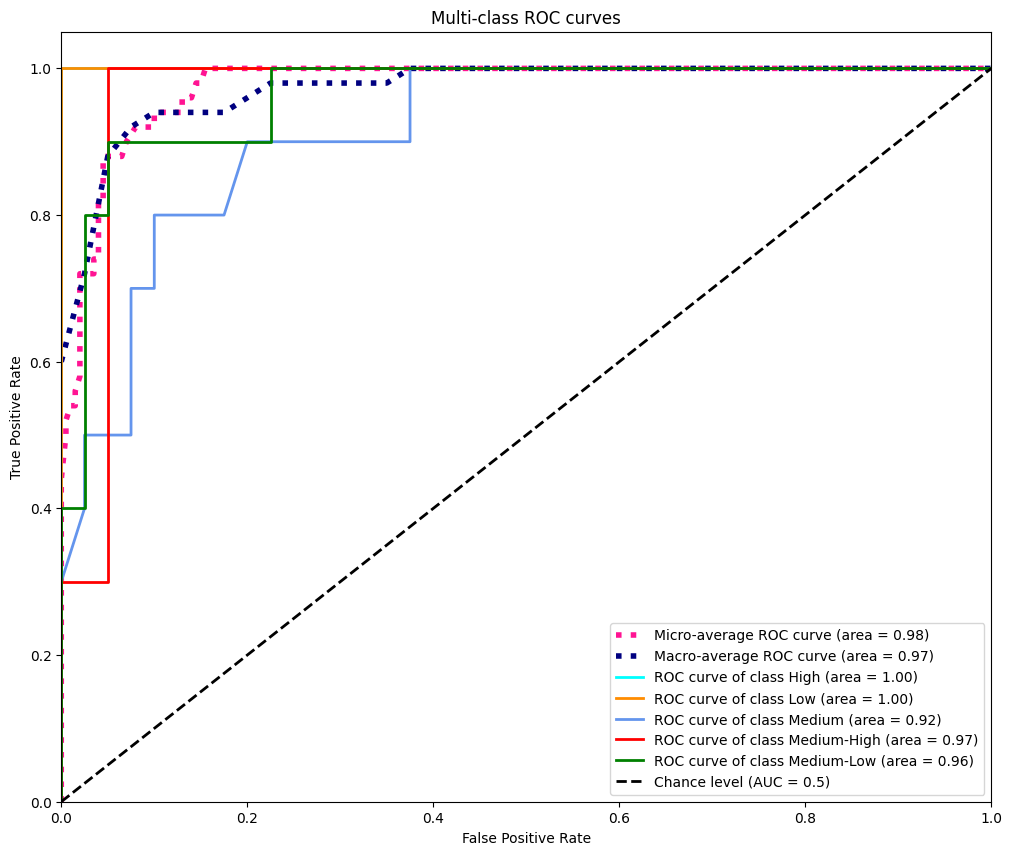

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get the number of classes
n_classes = y_test_binarized.shape[1]

# Store False Positive Rate, True Positive Rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calculate macro-average ROC curve and AUC
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

# Get class names from the LabelBinarizer to label individual curves
class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'] # Define distinct colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

Análisis de las Curvas ROC y AUC:

Curvas Individuales: El gráfico muestra la curva ROC para cada una de las 5 categorías de disc_PPP. La línea azul clara (aqua) representa la clase 'High' con un AUC de 1.00, y la línea naranja oscuro (darkorange) representa la clase 'Low' también con un AUC de 1.00. Esto sugiere que el modelo tiene una capacidad perfecta para distinguir estas dos clases de las demás en el conjunto de prueba. Las otras clases ('Medium', 'Medium-High', 'Medium-Low') también muestran un rendimiento muy bueno, con AUCs de 0.92, 0.97 y 0.96 respectivamente.

Micro-average ROC (rosa): Esta curva se calcula globalmente, considerando todos los pares de predicciones y etiquetas en todas las clases. El AUC micro-promedio es de 0.98, lo que indica un excelente rendimiento general del modelo en la clasificación multi-clase.

Macro-average ROC (azul oscuro): Esta curva promedia las métricas de ROC de cada clase de manera independiente. El AUC macro-promedio es de 0.97, lo que también confirma el alto rendimiento del modelo, especialmente porque toma en cuenta el rendimiento en cada clase sin importar su tamaño.

Nivel de Azar (gris discontinuo): La línea discontinua negra horizontal a AUC = 0.5 representa un clasificador que predice al azar. Todas las curvas de nuestro modelo están muy por encima de esta línea, lo que demuestra que el modelo es mucho mejor que el azar para todas las clases y en promedio.